#importing Modules

In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import r2_score 

#loading dataset

In [2]:
df = pd.read_csv('/Users/amandamortensen/Desktop/Data Analytics/Raw data/housing_price_dataset.csv')

In [ ]:
#conducting EDA on the dataset

In [72]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [73]:
df.head()

SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price
0        2126         4          1       1969  215355.283618
1        2459         3          2       1980  195014.221626
2        1860         2          1       1970  306891.012076
3        2294         2          1       1996  206786.787153
4        2130         5          2       2001  272436.239065

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SquareFeet  50000 non-null  int64  
 1   Bedrooms    50000 non-null  int64  
 2   Bathrooms   50000 non-null  int64  
 3   YearBuilt   50000 non-null  int64  
 4   Price       50000 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 1.9 MB


In [153]:
df.describe()

SquareFeet    Bedrooms   Bathrooms   YearBuilt        Price
count 50000.00000 50000.00000 50000.00000 50000.00000  50000.00000
mean   2006.37468     3.49870     1.99542  1985.40442 224827.32515
std     575.51324     1.11633     0.81585    20.71938  76141.84297
min    1000.00000     2.00000     1.00000  1950.00000 -36588.16540
25%    1513.00000     3.00000     1.00000  1967.00000 169955.86023
50%    2007.00000     3.00000     2.00000  1985.00000 225052.14117
75%    2506.00000     4.00000     3.00000  2003.00000 279373.63005
max    2999.00000     5.00000     3.00000  2021.00000 492195.25997

In [154]:
#identifying and visualising correlations, and selecing the dependent and indepedent variable 

In [155]:
df.corr()

SquareFeet  Bedrooms  Bathrooms  YearBuilt    Price
SquareFeet     1.00000  -0.00264   -0.00327    0.00048  0.75072
Bedrooms      -0.00264   1.00000    0.00741    0.00315  0.07262
Bathrooms     -0.00327   0.00741    1.00000    0.00375  0.02842
YearBuilt      0.00048   0.00315    0.00375    1.00000 -0.00229
Price          0.75072   0.07262    0.02842   -0.00229  1.00000

<Axes: >

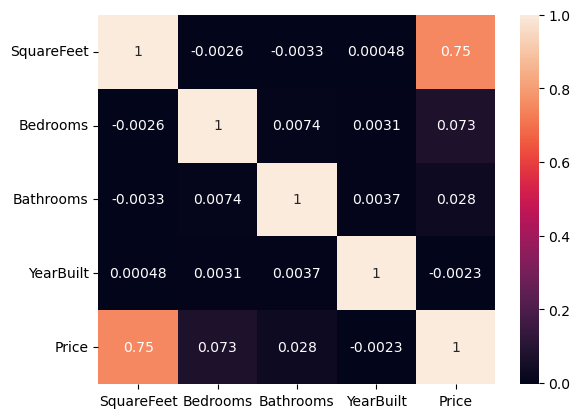

In [156]:
sns.heatmap(df.corr(), annot = True)

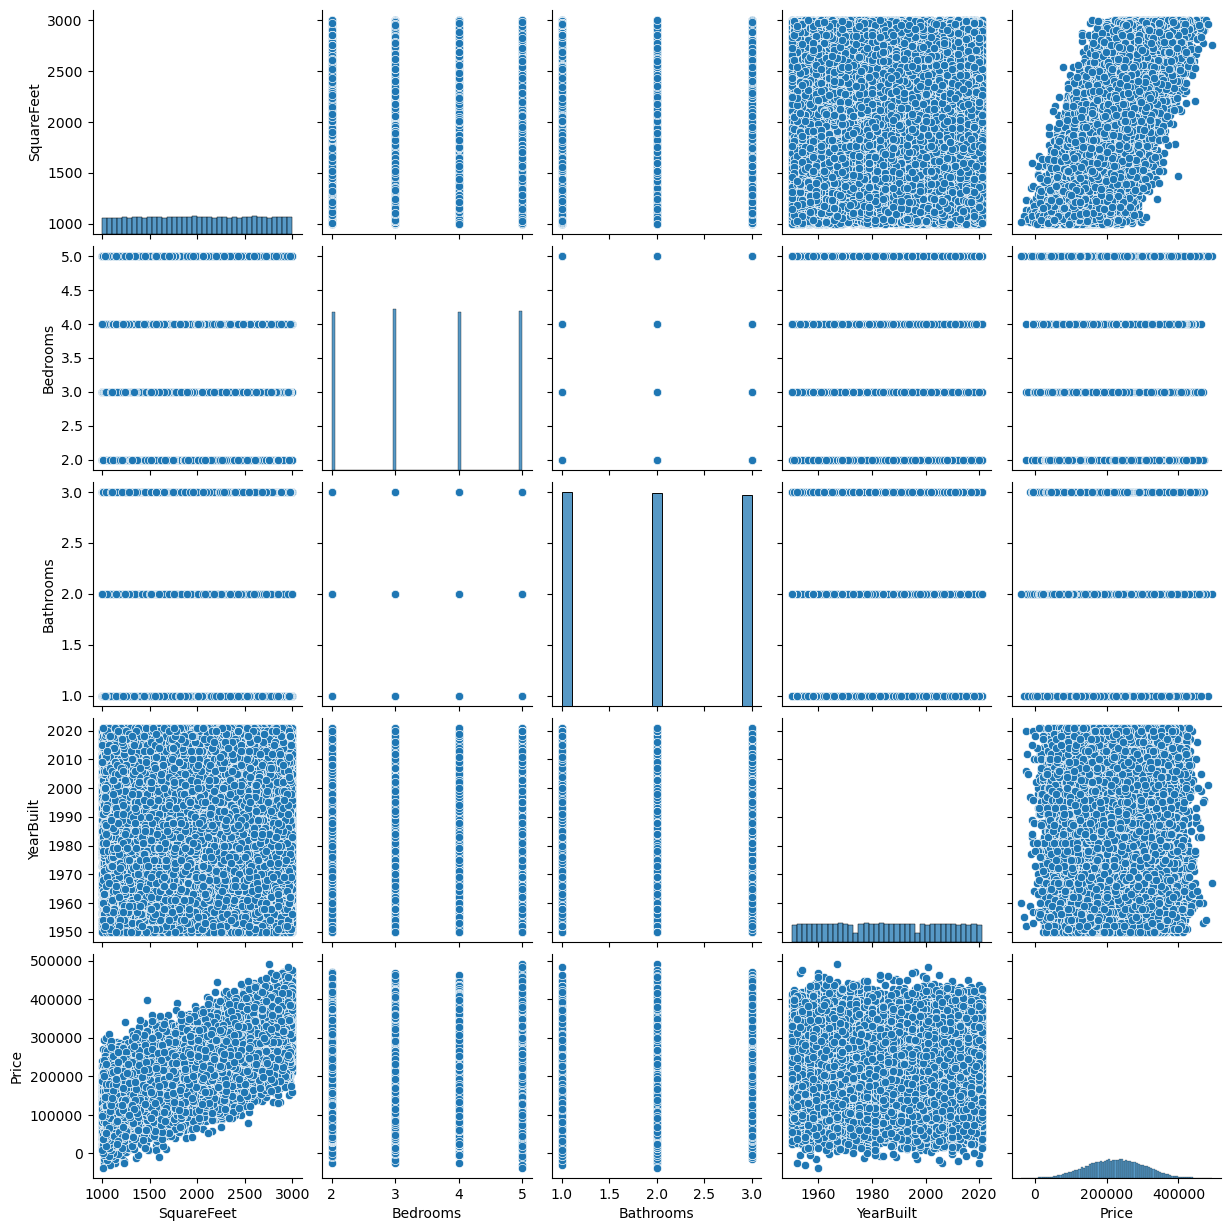

In [157]:
sns.pairplot(df)

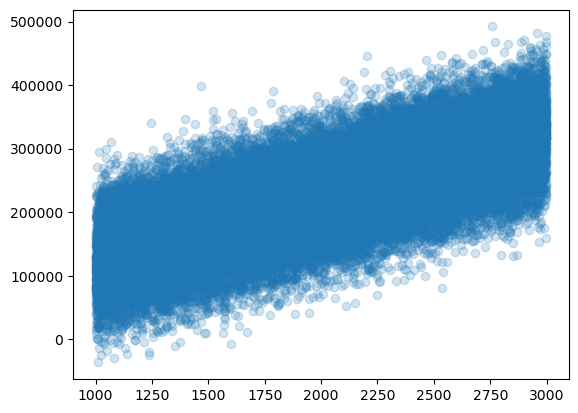

In [158]:
plt.scatter(x='SquareFeet', 
            y='Price', data = df, alpha = 0.2)

plt.show()

<Axes: xlabel='SquareFeet', ylabel='Price'>

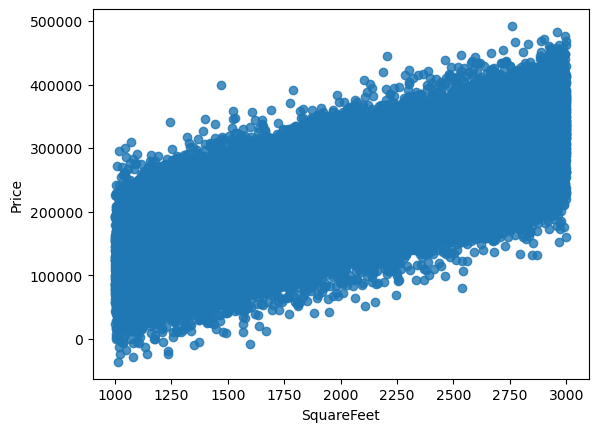

In [159]:
sns.regplot(x='SquareFeet', 
            y='Price', data = df, ci = None)


In [160]:
#building and training the model 

In [161]:
#identifying X and y, splitting the data and fitting it to the model 

In [162]:
X_var = df[['SquareFeet']] # independent variable
y_var = df['Price'] # dependent variable

In [163]:
x_train, x_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3)

In [164]:
slr_model = LinearRegression()

In [165]:
model_fit = slr_model.fit(x_train, y_train)

#looking in the coefients of our independent variable 

In [166]:

pd.DataFrame(slr_model.coef_,X_var.columns, columns = ['Coeff']) 
#if you hold all other variables constant one unit increase in SqaureFeet, 
#would result in 99.4 unit increase in our predicted variable, in this case price 

Coeff
SquareFeet 99.58116

In [167]:
#getting the slope and intercept
##based on our intercept and slope, price = 25456 X SquareFeet + 99.5
slr_slope = slr_model.coef_
slr_intercept = slr_model.intercept_
print(slr_intercept)
print(slr_slope)

25137.766709938733
[99.58115789]


In [168]:
#making predictions with with the model 

In [169]:
predictions = slr_model.predict(x_test)

In [170]:
print(predictions)

[144037.6692249  142046.04606719 262439.66595043 ... 152800.8111188
 162261.02111789 183870.13237899]


In [171]:
#predicting individual data entry - a hosue of 1800 sqf, has a price of 204301 according to our model 

In [172]:
slr_model.predict([[1800]]) 

/Users/amandamortensen/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([204383.85090334])

#visualising the test results (predicted vs actual)

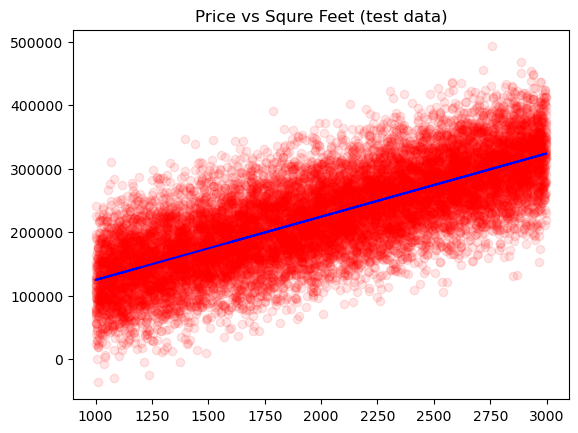

In [173]:
plt.scatter(x_test, y_test, color ='red', alpha = 0.1)
plt.plot(x_test, predictions, color = 'blue')
plt.title('Price vs Squre Feet (test data)')
plt_xlabel = ('Sqaure Feet')
plt.ylabel = ('Price')
plt.show()

In [174]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
reg_model_diff

Actual value  Predicted value
29009  139426.48192     144037.66922
5277   120239.45468     142046.04607
23616  156309.43621     262439.66595
43316  194092.55047     202292.64659
16887  178127.94498     135672.85196
16768  183982.24813     145730.54891
48348  144724.20270     182575.57733
16926  200339.91933     237444.79532
16365  243730.70038     248597.88500
4404   299067.24806     268812.86006
22033  263988.95108     280563.43669
6436    55943.19877     132784.99838
3669   280565.98440     306952.44353
42353  232184.68042     301276.31753
28036  270602.79222     248299.14153
47202  140077.24159     137166.56933
15793  329875.26951     321790.03605
7799   205365.14794     264530.87027
21941   82837.84089     184567.20048
27148  273690.90884     281957.57290
4125   159679.72206     193131.18006
31703  294039.68628     275584.37879
25717  184050.30913     126312.22312
42710  209919.82105     217926.88838
19920  130484.70268     206176.31175
11064  297190.22655     208466.67838
34837  254275.07098     255468.98490
18948  130871.63980     142046.04607
35380  279402.05863     303168.35953
46146  243273.78118     287832.86121
32141  202152.91998     226490.86795
31788  384181.76482     294305.63647
16866  154494.04756     147622.59091
23784  277954.35093     140950.65333
15959  275296.74648     248697.46616
28555  169875.51223     130992.53754
9875   181169.17303     172119.55575
17324  175388.42065     200500.18575
33297  310995.11306     282455.47869
28380  291720.79248     299981.76247
29393  317863.86133     197413.16985
18859  147449.66799     228283.32880
44958   45967.01122     155788.24586
23877  188312.80688     175903.63975
43262  151710.87152     188849.19027
9880   198542.80504     199504.37417
18007  170325.18464     198209.81911
20338  269364.32786     281360.08595
32880  221597.04708     237743.53879
26267  291855.25752     267020.39921
47968  163613.76197     195321.96554
22464  261008.62176     276978.51500
19687  227176.75273     228582.07227
28212   83402.51874     186757.98596
23920  110079.44698     138461.12438
19390  177505.48049     191338.71922
47145  211512.77744     237544.37648
16008  296193.91644     306155.79426
29730  287432.30214     221511.81006
15583   63344.80594     154394.10964
13543  217482.81241     135174.94617
14720  102323.85759     166144.68628
41706  186941.89275     160269.39796
14023  303800.80838     254473.17332
15681  176295.94884     262539.24711
6092   138622.82701     130693.79407
8263   254984.11162     189546.25838
21764  256102.45229     255468.98490
20307  111178.22819     126113.06081
1263   140611.75644     139058.61133
11161  197174.35502     224300.08248
30109  200819.35301     244813.80100
35635  191111.24922     242722.59669
36690  263112.69683     301674.64216
33471  246330.49751     239436.41848
40940   99674.11818     134876.20270
41776  190552.81316     180086.04838
11534  174485.67458     254274.01100
13048  331763.93494     297990.13932
18296  211321.59128     282853.80332
7308   269473.86720     246008.77490
34074   89344.81741     135274.52733
43897  289290.87879     231868.25048
38260  118147.27635     183770.55122
411    299136.08096     296894.74658
2580   283198.40331     250788.67048
32110  162173.58952     145531.38659
11949  172964.79850     138261.96207
38730  194979.28653     176202.38322
29438  220425.70953     237245.63301
12541  339445.26302     311931.50142
36708  323892.03588     312827.73184
49745  237063.80219     174409.92238
46716  419550.07789     323283.75342
1270   162027.02359     147821.75322
35927  113509.18958     153796.62270
30716  264884.74981     263535.05869
8734   352750.11488     260746.78627
34660  312909.43437     193728.66701
14170  201792.80120     176003.22091
8429   351410.57108     297492.23353
24183  195529.87849     198807.30606
33262  266607.13370     266422.91227
4019   250399.98723     255867.30953
28392  310803.40860     304164.17110
44323  313975.41237     226291.70564
21023  145666.08249     241428.04164
15335  1613

#visulising the distrubition of the residuals from the model (difference between preidcted and actual values)
#we see a normal distributions, which means we have selected the right model (SLR) for the case 

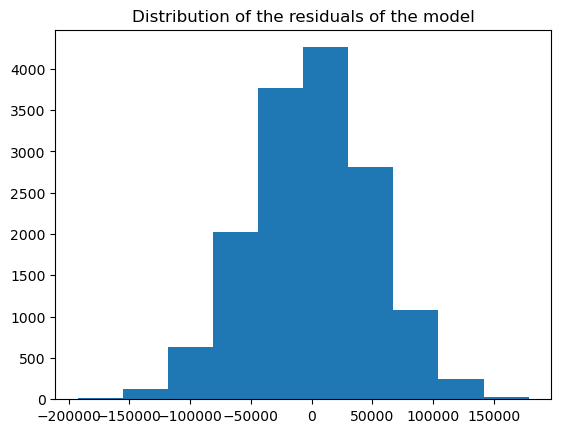

In [175]:
plt.hist(predictions - y_test)
plt.title('Distribution of the residuals of the model')
plt.show()

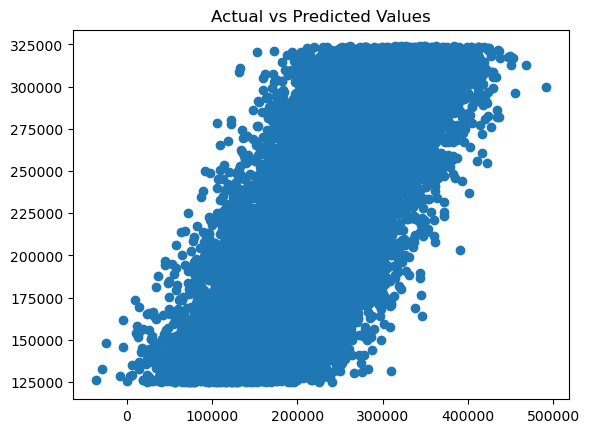

In [178]:
plt.scatter(y_test, predictions)
plt.title('Actual vs Predicted Values')
plt.show()


In [179]:
#Vislalising actual vs predicted values

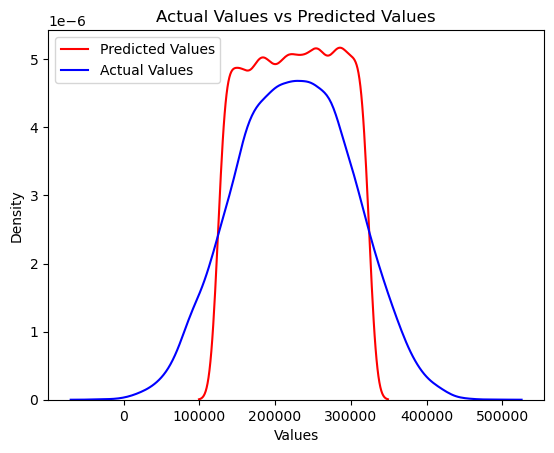

In [180]:
sns.kdeplot(predictions, color ='red', label = 'Predicted Values')
sns.kdeplot(y_test, color ='blue', label = 'Actual Values')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Values')
plt.legend(loc='upper left')


In [181]:
#testing performance of the model

In [182]:
mae = metrics.mean_absolute_error(y_test, predictions) #the average absolute difference between Y and X variables

In [183]:
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  39925.419247805024


In [184]:
#using r2_score to test the accuracy of our model 

In [185]:
score = r2_score(y_test, predictions)
print('The accuracy of the model is {}%'.format(round(score,2)*100))

The accuracy of the model is 56.00000000000001%


In [189]:
print('R-Squared:',slr_model.score(x_test, y_test))

R-Squared: 0.563752709491123
